In [25]:
# Importation des packaques et du dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Importation du fichier de scraping
df = pd.read_csv('vgsales.csv')

# Recherche des données manquantes
df.isnull().sum()

# Remplacement des années manquantes par 0 (autres)
df[['Year','metaNote','metaNbVote','userNote','userNbVote']] = df[['Year','metaNote','metaNbVote','userNote','userNbVote']].fillna(0)

# Remplacement des Publishers manquants par unknown
df['Publisher'] = df['Publisher'].fillna('unknown')

In [6]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,gamename,metaNote,metaNbVote,userNote,userNbVote,serie,samename,metaNoteQ,serieB
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Wii Sports,76.0,51.0,8.1,453.0,Wii Series,1,4,1
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Classic NES Series: Super Mario Bros.,84.0,14.0,8.5,98.0,Mario Series,1,4,1
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Mario Kart Wii,82.0,73.0,8.4,1047.0,NaN,1,4,0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort,80.0,73.0,8.2,293.0,Wii Sports,1,4,1
4,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Tetris 99,83.0,27.0,8.2,258.0,NaN,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11535,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.00,0.01,Myst IV: Revelation,82.0,36.0,0.0,0.0,Myst,1,4,1
11536,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01,Plushees,1.0,3.0,0.0,0.0,NaN,1,1,0
11537,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Men in Black II: Alien Escape,50.0,19.0,0.0,0.0,NaN,1,3,0
11538,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,SCORE International Baja 1000,29.0,4.0,0.0,0.0,NaN,1,2,0


count    11540.000000
mean         6.220589
std         17.150624
min          0.100000
25%          0.800000
50%          2.100000
75%          5.700000
max        827.400000
Name: Global_Sales, dtype: float64
length 10267


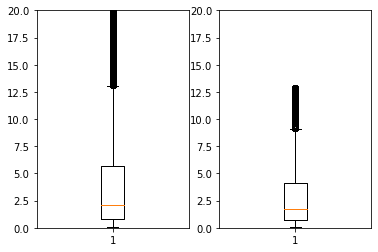

In [138]:
plt.subplot(1,2,1)
plt.boxplot(df['Global_Sales']);
plt.ylim([0,20]);
print(df['Global_Sales'].describe())

df2 = df[df['Global_Sales']<13]
print("length", len(df2))
plt.subplot(1,2,2)
plt.boxplot(df2['Global_Sales']);
plt.ylim([0,20]);

In [39]:
# Conversion de variable categoriel 
df_platform = pd.get_dummies(df['Platform'])
df_genre = pd.get_dummies(df['Genre'])
fusion = pd.concat([df,df_platform,df_genre],axis=1)
df = fusion.drop(['Rank','Name','Platform','Genre','Publisher','samename','NA_Sales','EU_Sales','JP_Sales','Other_Sales','gamename','serie'],axis=1)

KeyError: 'Platform'

In [132]:
# preprocessing
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit_transform(df)
matrice=df.corr()
#fig,ax=plt.subplots(figsize=(20,20))
#sns.heatmap(matrice, annot=True, cmap='coolwarm');

# définition de la target et data
target = df['Global_Sales']
data = df.drop(['Global_Sales'],axis=1)

# séparation en jeu d'entrainement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
# Test du modèle de regression linéaire

from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train_scaled,y_train)
print("Train score :", clf.score(X_train_scaled,y_train))

clf.fit(X_test_scaled,y_test)
print("Test score :",clf.score(X_test_scaled,y_test))

Train score : 0.22718133446815947
Test score : 0.2594239534643261


In [116]:
# Test du modèle RidgeCV
from sklearn.linear_model import RidgeCV

ridge_reg = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train_scaled, y_train)
print("Train score :", ridge_reg.score(X_train_scaled,y_train))

ridge_reg.fit(X_test_scaled, y_test)
print("Test score :",ridge_reg.score(X_test_scaled,y_test))

Train score : 0.2271437754032869
Test score : 0.2583463971202129


In [136]:
# Test du modèle Lasso
from sklearn.linear_model import Lasso

lasso_r = Lasso(alpha=1)
lasso_r.fit(X_train_scaled,y_train)
print("Train score :", lasso_r.score(X_train_scaled,y_train))

lasso_r.fit(X_test_scaled,y_test)
print("Test score :",lasso_r.score(X_test_scaled,y_test))

Train score : 0.15011280262784044
Test score : 0.08787239426369842


In [134]:
target = (df['Global_Sales']*10).astype('int')


# séparation en jeu d'entrainement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# Scale
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
# Test modèle KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
knn.fit(X_train_scaled,y_train)
print("Train score :", knn.score(X_train_scaled,y_train))

knn.fit(X_test_scaled,y_test)
print("Test score :",knn.score(X_test_scaled,y_test))

Train score : 0.36064775356142703
Test score : 0.35978578383641674


In [121]:
# Test modèle Regression Logistic
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1.0)
lr.fit(X_train_scaled,y_train)
print("Train score :", lr.score(X_train_scaled,y_train))

lr.fit(X_test_scaled,y_test)
print("Test score :",lr.score(X_test_scaled,y_test))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train score : 0.08340435894313893
Test score : 0.1626095423563778


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [135]:
# test modèle random forest
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion='gini')
dt_clf.fit(X_train_scaled,y_train)
print("Train score :", dt_clf.score(X_train_scaled,y_train))

dt_clf.fit(X_test_scaled,y_test)
print("Test score :",dt_clf.score(X_test_scaled,y_test))

Train score : 0.9443240901213171
Test score : 0.9714038128249567


In [ ]:
orderencode